#Solving the Anharmonic Oscillator Problem Using Runge–Kutta Methods & the Modified-Euler Algorithm

----------------------------------------------------

In [ ]:
import math
from matplotlib import pyplot as plt
from scipy.integrate import odeint
import numpy as np

#1. Runge-Kutta

Here, let us write our own rk2 & rk4 functions.

Function for the anharmonic oscillator equation:

In [ ]:
def f(t, x, k, alpha):
  return k * x * ( 1 - alpha * x )

Function for rk2:

In [ ]:
def rk2( x, x0, y0, h, k, alpha ) :
  N = math.ceil( (x - x0) / h )

  y = y0
  for i in range(N):
    K1 = h * f( x0, y, k, alpha )
    K2 = h * f( x0 + h / 2, y + K1 / 2, k, alpha )

    x0 += h
    y += (K1 + 2 * K2) / 6

  return y

(b)

Solving the anharmonic oscillator equation using our rk2 function:

In [ ]:
x = 1
x0 = 0
y0 = 0.4
h = 0.1

k = 1
alpha = 0.0

print( "y_final = ", rk2( x, x0, y0, h, k, alpha ) )

y_final =  0.6619742251489092


(c)

For an anharmonic oscillator, we find that

T = 4 * sqrt( m / 2ka ) * I

where I is the definite integral, from 0 to 1, of 1/sqrt(1-x^3).

--------------------------------------------

Taking a = 1 as well as k = 1 and m = 1, we get T ~ 3.966

In [ ]:
x = 1
x0 = 0
y0 = 0.4
h = 0.3

k = 1
alpha = 0.0

print( "y_final = ", rk2( x, x0, y0, h, k, alpha ) )

y_final =  0.73682388025


(d)

Using rk4:

In [ ]:
def f(t, x):
  k = 1
  alpha = 0
  return k * x * ( 1 - alpha * x )

def rk4( x0, y0, xn, h ):
    N = math.ceil( (x - x0) / h )

    for i in range(N):
        K1 = f( x0, y0 ) * h
        K2 = f( ( x0 + h / 2 ), ( y0 + K1  /2 ) ) * h
        K3 = f( ( x0 + h / 2 ), ( y0 + K2 / 2 ) ) * h
        K4 = f( ( x0 + h ), ( y0 + K3 ) ) * h

        yn = y0 + ( K1 + 2 * K2 + 2 * K3 + K4 ) / 6

        x0 += h
        y0 = yn

    return yn

x0 = 0
y0 = 0.4
xn = 1
h = 0.3

print( "y_final = ", rk4( x0, y0, xn, h ) )

y_final =  1.3279629179916694


Using scipy.odeint:

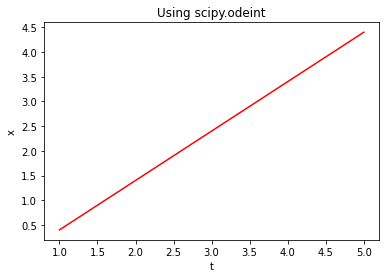

In [ ]:
def f(t,x):
  k = 1
  alpha = 0
  return (t[1],k*alpha*t[0]-k*alpha*t[0]**2)

y0 = [0.4,1]
x = np.linspace( 1, 5, 100 )
t = odeint( f, y0, x )
y = t[:,0]
plt.plot(x,y,"r-")
plt.xlabel("t")
plt.ylabel("x")
plt.title("Using scipy.odeint")
plt.show()

(e)

Solving the equation using rk2, this time with α = 0.09:

In [ ]:
x = 1
x0 = 0
y0 = 0.4
h = 0.3

k = 1
alpha = 0.9

print( "y = ", rk2( x, x0, y0, h, k, alpha ) )

y =  0.562785442423739


Using rk4 with α = 0.09:

In [ ]:
def f(t, x):
  k = 1
  alpha = 0.9
  return k * x * ( 1 - alpha * x )

def rk4( x0, y0, xn, h ):
    N = math.ceil( (x - x0) / h )

    for i in range(N):
        K1 = f( x0, y0 ) * h
        K2 = f( ( x0 + h / 2 ), ( y0 + K1  /2 ) ) * h
        K3 = f( ( x0 + h / 2 ), ( y0 + K2 / 2 ) ) * h
        K4 = f( ( x0 + h ), ( y0 + K3 ) ) * h

        yn = y0 + ( K1 + 2 * K2 + 2 * K3 + K4 ) / 6

        x0 += h
        y0 = yn

    return yn

x0 = 0
y0 = 0.4
xn = 1
h = 0.3

print( "y_final = ", rk4( x0, y0, xn, h ) )

y_final =  0.7236340974610814


Using scipy.odeint to plot the results with α = 0.09:

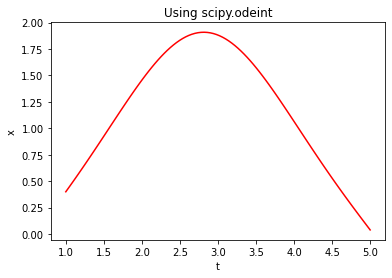

In [ ]:
def f(t,x):
  k = 1
  alpha = 0.9
  return (t[1],k*alpha*t[0]-k*alpha*t[0]**2)

y0 = [0.4,1]
x = np.linspace( 1, 5, 100 )
t = odeint( f, y0, x )
y = t[:,0]
plt.plot(x,y,"r-")
plt.xlabel("t")
plt.ylabel("x")
plt.title("Using scipy.odeint")
plt.show()

#2. Modified-Euler Algorithm

Solving the anharmonic oscillator problem by using the Modified-Euler
algorithm:

In [ ]:
def f(t, x, k, alpha):
  return k * x * ( 1 - alpha * x )

def ModifiedEuler( t, tn, y, h, k, alpha ):
  while( t < tn ):

    # predict value
    y_n1_p = y + h * f(t, y, k, alpha)

    # correct predicted value
    y_n1_c = y_n1_p
    while ( abs( y_n1_c - y_n1_p ) > 1 ):
        y_n1_p = y_n1_c
        y_n1_c = y + h * ( f(t, y, k, alpha ) + f( t+h, y_n1_p, k, alpha ) ) / 2

    y = y_n1_c
    t = t + h

  return t, y

if __name__ == '__main__':
  k = 1
  alpha = 0.9

  # initial conditions
  x = 0
  y = 0.4

  x_final = 1
  h = 0.1

  t, y = ModifiedEuler( x, x_final, y, h, k, alpha )

  print( "y_final = ", y )

y_final =  0.6977443229903537
